<a href="https://colab.research.google.com/github/EsthefaniAMT/Computer_Vision_cat_vs_dog/blob/main/fcc_cat_dog_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                      directory=test_dir,
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      class_mode='binary',
                                                      shuffle=False,
                                                      classes=['.']) # Added to exclude .DS_Store

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


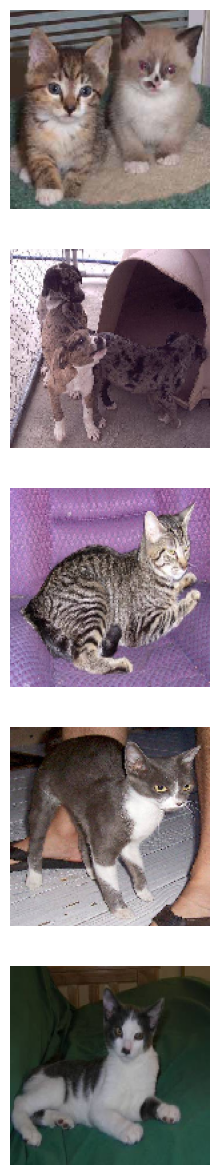

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest',
rescale=1./255)

Found 2000 images belonging to 2 classes.


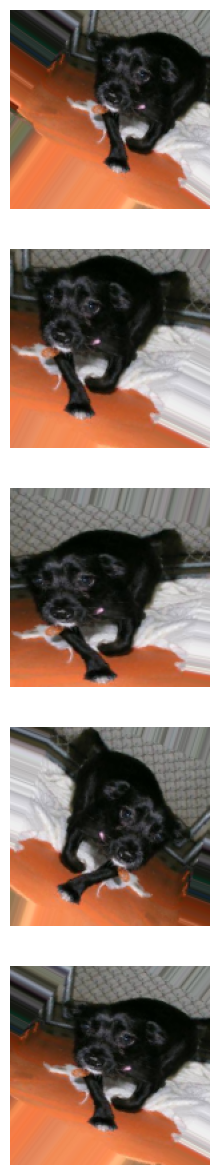

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7

from tensorflow.keras import datasets, layers, models

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) # Added Flatten layer
model.add(layers.Dense(2)) # Changed to 2 output units for SparseCategoricalCrossentropy

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       147,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,290 (798.01 KB)

 Trainable params: 204,290 (798.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#7.1
# Calculate steps per epoch for the training and validation datasets
STEPS_PER_EPOCH = len(train_data_gen) // batch_size # calculated as the total number of training images divided by the batch size.
#It represents the number of batches the model will process in one epoch.
VALIDATION_STEPS = len(val_data_gen) // batch_size #calculated as the total number of validation images divided by the batch size.
#It determines how many batches from the validation set are used for validation after each epoch.

print(f"Steps per epoch: {STEPS_PER_EPOCH}")
print(f"Validation steps: {VALIDATION_STEPS}")

Steps per epoch: 0
Validation steps: 0


In [ ]:
# 8
history = model.fit(x=train_data_gen,  steps_per_epoch=STEPS_PER_EPOCH, epochs=epochs,
                    validation_data=val_data_gen, validation_steps=VALIDATION_STEPS)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 115s 7s/step - accuracy: 0.4912 - loss: 0.8721 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 132s 6s/step - accuracy: 0.5332 - loss: 0.6870 - val_accuracy: 0.5710 - val_loss: 0.6609
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.5622 - loss: 0.6742 - val_accuracy: 0.6090 - val_loss: 0.6559
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.5587 - loss: 0.6683 - val_accuracy: 0.6120 - val_loss: 0.6413
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 152s 7s/step - accuracy: 0.5777 - loss: 0.6674 - val_accuracy: 0.5960 - val_loss: 0.6437
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 103s 6s/step - accuracy: 0.5830 - loss: 0.6503 - val_accuracy: 0.6310 - val_loss: 0.6206
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 103s 6s/step - accuracy: 0.6204 - loss: 0.6417 - val_accuracy: 0.6750 - val_loss: 0.6318
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 103s 6s/step - accuracy: 0.6416 - loss: 0.6307 - val_accuracy: 0.6400 - v

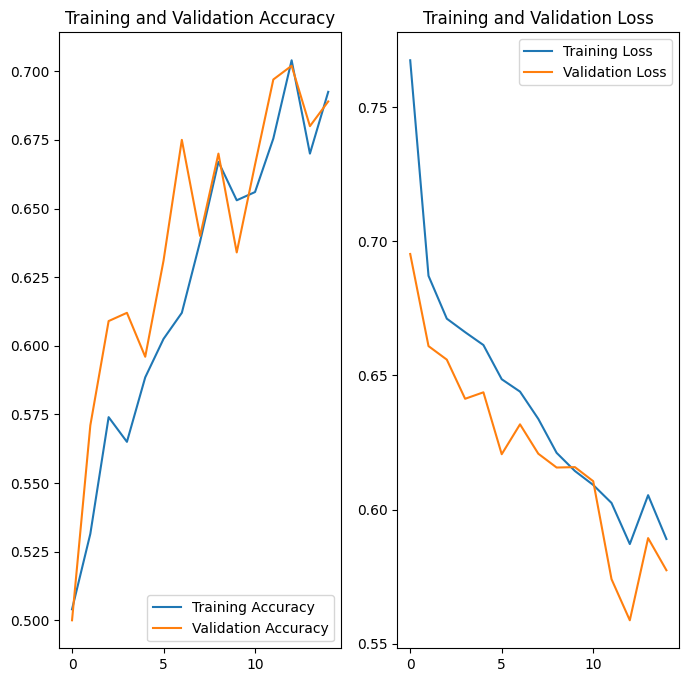

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#9.1
#to save the model to reload it
model.save("dogs_vs_cats_test.keras")
new_model = tf.keras.models.load_model('dogs_vs_cats_test.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


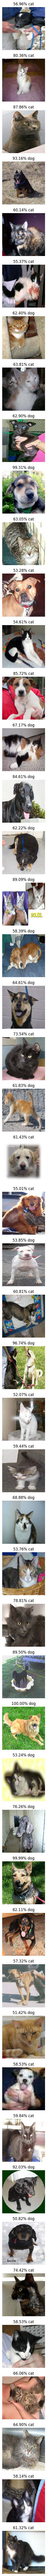

In [ ]:
#10
predictions = new_model.predict(test_data_gen) # Use new_model for prediction

# Apply softmax to get probabilities
probabilities = tf.nn.softmax(predictions).numpy()[:, 1] # Get the probability for the dog class

plotImages(test_data_gen[0][0], probabilities)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!


In [ ]:
print(os.listdir(test_dir)) #For the cell 3: to take a look in the test_dir because the output is 0. There's a hidden file .DS:Store which is interfering with the loading, must be excluded

['9.jpg', '41.jpg', '36.jpg', '50.jpg', '11.jpg', '31.jpg', '5.jpg', '6.jpg', '17.jpg', '25.jpg', '32.jpg', '18.jpg', '21.jpg', '10.jpg', '7.jpg', '14.jpg', '13.jpg', '3.jpg', '30.jpg', '24.jpg', '39.jpg', '12.jpg', '46.jpg', '.DS_Store', '47.jpg', '15.jpg', '40.jpg', '44.jpg', '26.jpg', '45.jpg', '19.jpg', '1.jpg', '4.jpg', '33.jpg', '29.jpg', '22.jpg', '48.jpg', '43.jpg', '20.jpg', '8.jpg', '2.jpg', '23.jpg', '16.jpg', '35.jpg', '42.jpg', '34.jpg', '28.jpg', '38.jpg', '27.jpg', '37.jpg', '49.jpg']
